Trees

In [9]:
import pandas as pd
file_path = 'shots_2022.csv'
df_base = pd.read_csv(file_path)
description = df_base.describe()
print(description)

              shotID  arenaAdjustedShotDistance  arenaAdjustedXCord  \
count  122026.000000              122026.000000       122026.000000   
mean    61012.500000                  33.783658           -0.264345   
std     35226.016311                  19.352137           63.973502   
min         0.000000                   1.000000          -99.000000   
25%     30506.250000                  17.000000          -64.000000   
50%     61012.500000                  32.000000           -1.000000   
75%     91518.750000                  48.000000           64.000000   
max    122025.000000                  99.000000           99.000000   

       arenaAdjustedXCordABS  arenaAdjustedYCord  arenaAdjustedYCordAbs  \
count          122026.000000       122026.000000          122026.000000   
mean               61.090874            0.032518              15.483913   
std                18.988244           19.383625              11.660722   
min                 0.000000          -48.000000            

Decision Tree Results:
Accuracy: 0.926165696959764
Confusion Matrix:
 [[22598     4]
 [ 1798     6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     22602
           1       0.60      0.00      0.01      1804

    accuracy                           0.93     24406
   macro avg       0.76      0.50      0.48     24406
weighted avg       0.90      0.93      0.89     24406

Decision Tree Summary:
|--- distance <= 31.39
|   |--- distance <= 12.29
|   |   |--- distance <= 3.08
|   |   |   |--- class: 1
|   |   |--- distance >  3.08
|   |   |   |--- class: 0
|   |--- distance >  12.29
|   |   |--- distance <= 22.42
|   |   |   |--- class: 0
|   |   |--- distance >  22.42
|   |   |   |--- class: 0
|--- distance >  31.39
|   |--- distance <= 40.51
|   |   |--- shot_type_slapshot <= 0.50
|   |   |   |--- class: 0
|   |   |--- shot_type_slapshot >  0.50
|   |   |   |--- class: 0
|   |--- distance >  40.51
|   |   |--- 

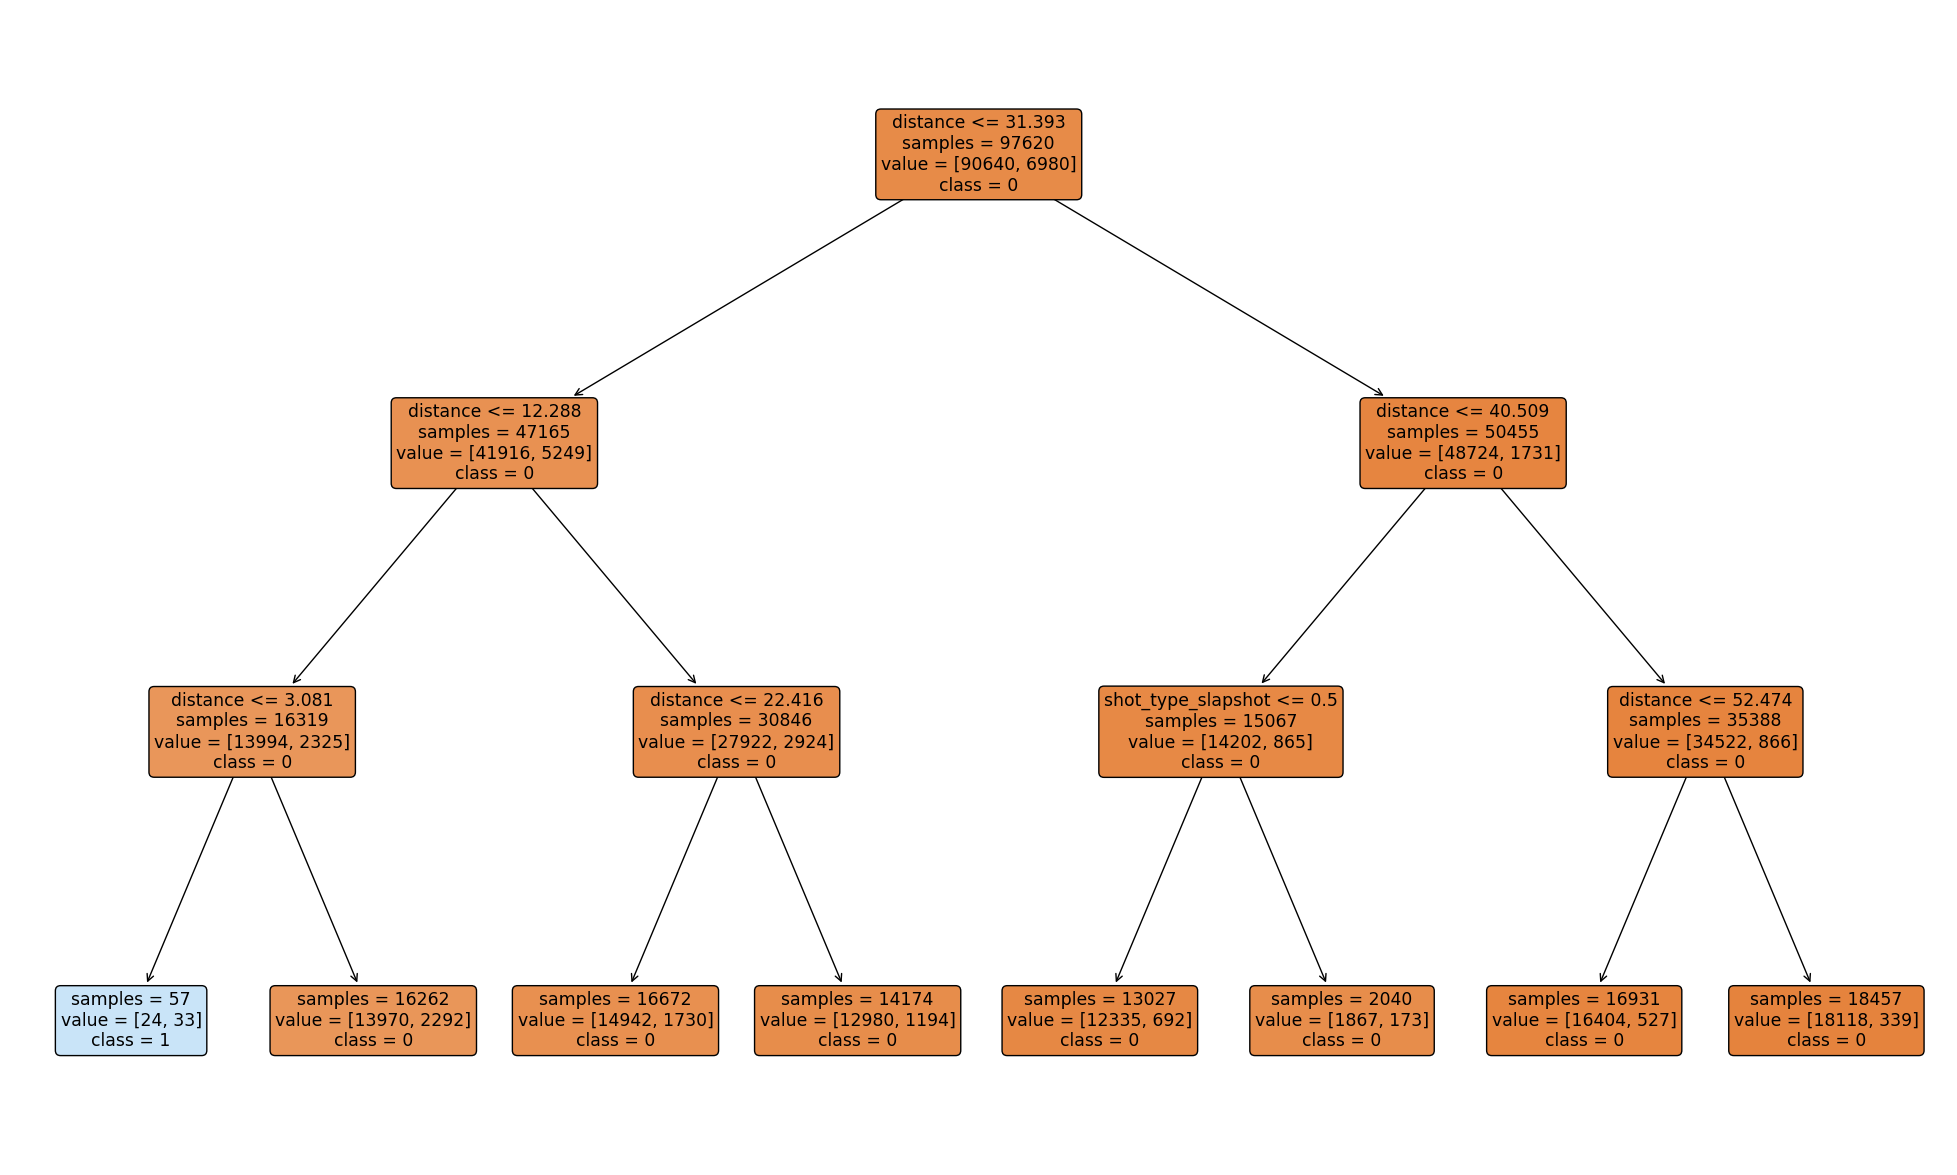

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

def print_results(dt_predictions,y_test):
    print("Decision Tree Results:")
    print("Accuracy:", accuracy_score(y_test, dt_predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
    print("Classification Report:\n", classification_report(y_test, dt_predictions))

def print_tree(dt_model):
    plt.figure(figsize=(25, 15))
    plot_tree(dt_model, feature_names=['distance', 'shot_type_slapshot'], class_names=['0', '1'], filled=True, rounded=True, impurity=False)
    plt.show()

def print_tree_rules(dt_model):
    tree_rules = export_text(dt_model, feature_names=['distance', 'shot_type_slapshot', ])
    print("Decision Tree Summary:")
    print(tree_rules)

def create_tree(working_df):
    X_train, X_test, y_train, y_test = train_test_split(working_df[['distance', 'shot_type_slapshot']], working_df['is_goal'], test_size=0.2, random_state=42)
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=3)
    dt_model.fit(X_train, y_train)
    dt_predictions = dt_model.predict(X_test)
    return_value = (dt_model, dt_predictions,y_test)
    return return_value

def create_working_dataframe(df_base):
    working_df = df_base[['arenaAdjustedShotDistance', 'goal', 'shotType']]
    working_df = working_df.iloc[:]
    working_df['shotType'] = working_df['shotType'].fillna('UNK')
    working_df['shot_type_slapshot'] = (working_df['shotType'] == 'SLAP').astype(int)
    working_df = working_df.rename(columns={'arenaAdjustedShotDistance': 'distance', 'goal': 'is_goal'})
    working_df = working_df[['distance', 'shot_type_slapshot', 'is_goal',]]
    return working_df

working_df = create_working_dataframe(df_base)
(dt_model, dt_predictions, y_test) = create_tree(working_df)
print_results(dt_predictions,y_test)
print_tree_rules(dt_model)
print_tree(dt_model)

